In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D

from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import glob

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
from random import random
from PIL import Image
import theano

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

In [11]:
Final = pd.read_csv("Concatnated.csv")

In [12]:
len(Final)

292986

In [13]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [14]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [15]:
X = Final[:, :446]
y = Final[:,446]

In [16]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [17]:
pd.value_counts(y)

0.0    146493
2.0     48831
1.0     48831
3.0     47845
dtype: int64

In [18]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :446])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 291999:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

291990
291990


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size=0.05, random_state=0)

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [21]:
pd.value_counts(y_train)

0.0    139083
1.0     46473
2.0     46432
3.0     45402
dtype: int64

In [22]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [23]:
print(y_train[0])
print(y_test[64])
print(y_train[2345])
print(y_test[97])

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]


In [24]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 10, 446, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 10, 446, 1))

In [25]:
print(X_train[0])
print('\n')
print(y_train[0])

[[[6.26420715e-03]
  [3.46753500e-03]
  [1.24357960e-02]
  ...
  [6.88301896e-04]
  [2.15896653e-05]
  [2.30987862e-05]]

 [[6.27666623e-03]
  [3.43246924e-03]
  [1.24863026e-02]
  ...
  [6.86304629e-04]
  [2.16464368e-05]
  [2.32112929e-05]]

 [[6.28948837e-03]
  [3.39735960e-03]
  [1.25363542e-02]
  ...
  [6.84298432e-04]
  [2.17030464e-05]
  [2.33234828e-05]]

 ...

 [[6.35906148e-03]
  [3.22137356e-03]
  [1.27796769e-02]
  ...
  [6.74136070e-04]
  [2.19835065e-05]
  [2.38793600e-05]]

 [[6.37407207e-03]
  [3.18613320e-03]
  [1.28269334e-02]
  ...
  [6.72077840e-04]
  [2.20390486e-05]
  [2.39894571e-05]]

 [[6.38944923e-03]
  [3.15089335e-03]
  [1.28737139e-02]
  ...
  [6.70011197e-04]
  [2.20943966e-05]
  [2.40991735e-05]]]


[0. 0. 1. 0.]


In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='ReLU',padding='same',input_shape=(10, 446, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='ReLU',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='ReLU',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='ReLU'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 446, 32)       320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 446, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 223, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 223, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 223, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5, 223, 64)        0         
                                                        

In [27]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1CNN.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [28]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/5
8669/8669 [==============================] - 77s 9ms/step - loss: 0.0880 - acc: 0.9844 - val_loss: 0.0245 - val_acc: 0.9973
Epoch 2/5
8669/8669 [==============================] - 74s 9ms/step - loss: 0.0241 - acc: 0.9971 - val_loss: 0.0178 - val_acc: 0.9977
Epoch 3/5
8669/8669 [==============================] - 75s 9ms/step - loss: 0.0200 - acc: 0.9980 - val_loss: 0.0208 - val_acc: 0.9979
Epoch 4/5
8669/8669 [==============================] - 75s 9ms/step - loss: 0.0213 - acc: 0.9982 - val_loss: 0.0142 - val_acc: 0.9981
Epoch 5/5
8669/8669 [==============================] - 74s 9ms/step - loss: 0.0217 - acc: 0.9982 - val_loss: 0.0194 - val_acc: 0.9984


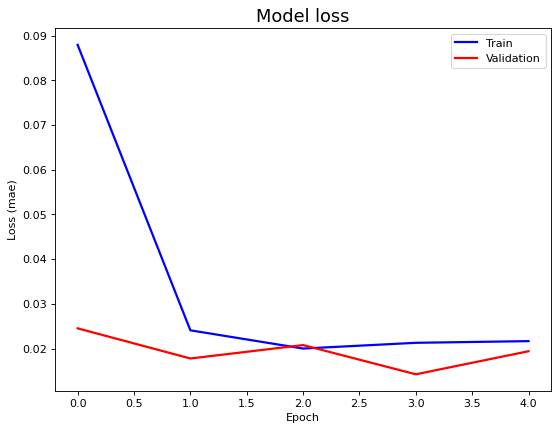

In [29]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [30]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[7387    1    0   12]
 [   3 2352    1    2]
 [   2    0 2397    0]
 [   2    0    1 2440]]


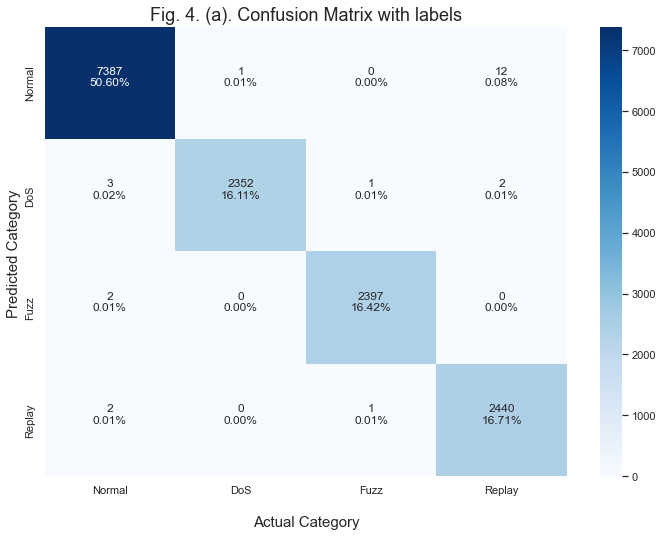

In [32]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Fig. 4. (a). Confusion Matrix with labels', fontsize=18);
ax.set_xlabel('\nActual Category', fontsize=15)
ax.set_ylabel('Predicted Category ', fontsize=15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])
ax.yaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [33]:
from sklearn.metrics import classification_report
class_names = ["Normal", "DoS", "Fuzz", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      7400
         DoS       1.00      1.00      1.00      2358
        Fuzz       1.00      1.00      1.00      2399
      Replay       0.99      1.00      1.00      2443

    accuracy                           1.00     14600
   macro avg       1.00      1.00      1.00     14600
weighted avg       1.00      1.00      1.00     14600



ROC AUC score: 0.9989084507256974


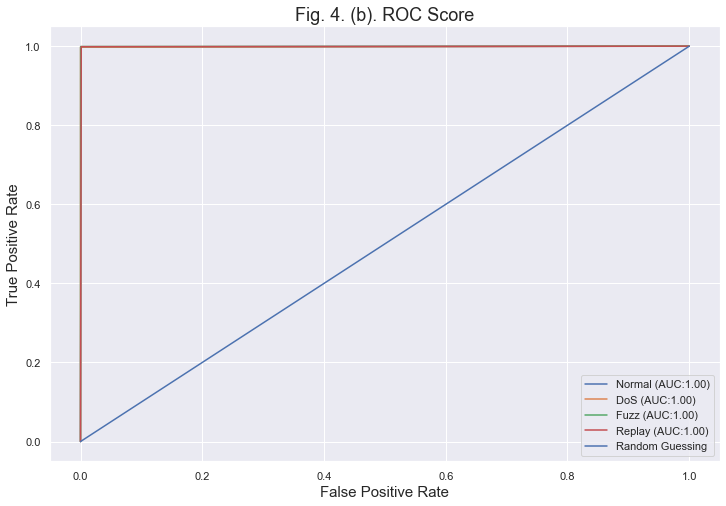

In [34]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "DoS", "Fuzz", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_title('Fig. 4. (b). ROC Score', fontsize=18);
c_ax.set_xlabel('False Positive Rate', fontsize=15)
c_ax.set_ylabel('True Positive Rate', fontsize=15)
plt.show()